In [32]:
#import all the libraries:

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
#handling exceptions and erron while loading the file
try:
    data ='sentimentdataset.csv'
    df = pd.read_csv(data)
    #disple the dataset
    print(df)
    df.head(10)
except FileNotFoundError:
    print("Error: social_media_data.csv not found.")


     Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
0               0             0           0   
1               1             1           1   
2               2             2           2   
3               3             3           3   
4               4             4           4   
..            ...           ...         ...   
727           727           728         732   
728           728           729         733   
729           729           730         734   
730           730           731         735   
731           731           732         736   

                                                  Text    Sentiment  \
0     Enjoying a beautiful day at the park!        ...   Positive     
1     Traffic was terrible this morning.           ...   Negative     
2     Just finished an amazing workout! 💪          ...   Positive     
3     Excited about the upcoming weekend getaway!  ...   Positive     
4     Trying out a new recipe for dinner tonight.  ...   Neutral      
..       

In [47]:
#Revoming extra space from column names
df.columns = df.columns.str.strip()

#check for missing values
print(df.isnull().sum())

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [107]:
# Handle missing values (e.g., fill with mean, median, or drop rows)
# Example: fill missing likes with the mean
if 'likes' in df.columns:
    df['likes'].fillna(df['likes'].mean(), inplace=True)
# Example: drop rows with missing comments
if 'comments' in df.columns:
    df.dropna(subset=['comments'], inplace=True)
df.to_csv(data)#to save the file
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0.2      732 non-null    int64         
 1   Unnamed: 0.1      732 non-null    int64         
 2   Unnamed: 0        732 non-null    int64         
 3   Text              732 non-null    object        
 4   Sentiment         732 non-null    object        
 5   Timestamp         732 non-null    datetime64[ns]
 6   User              732 non-null    object        
 7   Platform          732 non-null    object        
 8   Hashtags          732 non-null    object        
 9   Retweets          732 non-null    float64       
 10  Likes             732 non-null    float64       
 11  Country           732 non-null    object        
 12  Year              732 non-null    int64         
 13  Month             732 non-null    int64         
 14  Day               732 non-

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Total_Engagement
0,0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,Usa,2023,1,15,12,45.0
1,1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,15.0
2,2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,Usa,2023,1,15,15,60.0
3,3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,Uk,2023,1,15,18,23.0
4,4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,37.0


In [52]:
#checkng for duplicates values

print(f'Number of duplicate rosw: {df.duplicated().sum()}')

Number of duplicate rosw: 0


In [53]:
# summary statistics
print(df.describe())

       Unnamed: 0.1  Unnamed: 0    Retweets       Likes         Year  \
count    732.000000  732.000000  732.000000  732.000000   732.000000   
mean     366.464481  369.740437   21.508197   42.901639  2020.471311   
std      211.513936  212.428936    7.061286   14.089848     2.802285   
min        0.000000    0.000000    5.000000   10.000000  2010.000000   
25%      183.750000  185.750000   17.750000   34.750000  2019.000000   
50%      366.500000  370.500000   22.000000   43.000000  2021.000000   
75%      549.250000  553.250000   25.000000   50.000000  2023.000000   
max      732.000000  736.000000   40.000000   80.000000  2023.000000   

            Month         Day        Hour  
count  732.000000  732.000000  732.000000  
mean     6.122951   15.497268   15.521858  
std      3.411763    8.474553    4.113414  
min      1.000000    1.000000    0.000000  
25%      3.000000    9.000000   13.000000  
50%      6.000000   15.000000   16.000000  
75%      9.000000   22.000000   19.000000  

In [59]:
#Analyze user Engagement trends

#Describe numerical columns
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [80]:
# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [81]:
# Create a Total Engagement column (Likes + Retweets)
df['Total_Engagement'] = df['Likes'] + df['Retweets']

In [82]:
# Display the first few rows
print("\nFirst Few Rows of Data")
df.head(10)


First Few Rows of Data


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Total_Engagement
0,0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,45.0
1,1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,15.0
2,2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,60.0
3,3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,23.0
4,4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,37.0
5,5,5,5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9,75.0
6,6,6,6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14,30.0
7,7,7,7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19,45.0
8,8,8,8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8,90.0
9,9,9,9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17,12,53.0


In [83]:
# Set Seaborn style
sns.set(style="whitegrid")

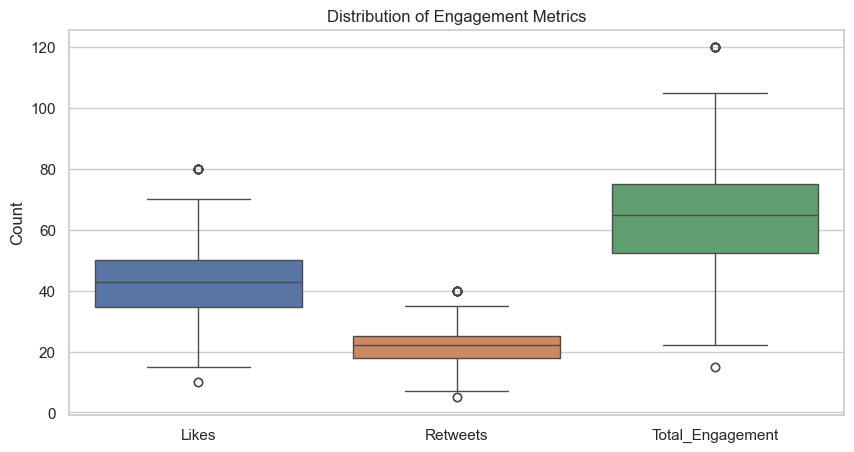

In [84]:
#  Engagement Distribution
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Likes', 'Retweets', 'Total_Engagement']])
plt.title("Distribution of Engagement Metrics")
plt.ylabel("Count")
plt.show()

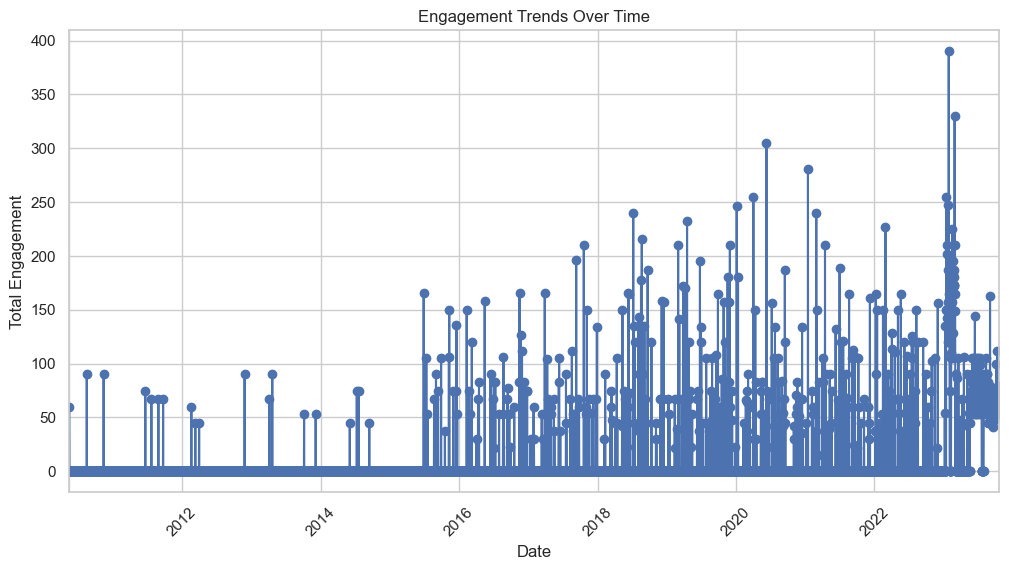

In [88]:
#  Engagement Trends Over Time
plt.figure(figsize=(12, 6))
df.set_index('Timestamp')['Total_Engagement'].resample('D').sum().plot(marker='o', linestyle='-')
plt.title("Engagement Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Engagement")
plt.xticks(rotation=45)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16416\694321640.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_influencers.index, y=top_influencers.values, palette='viridis')


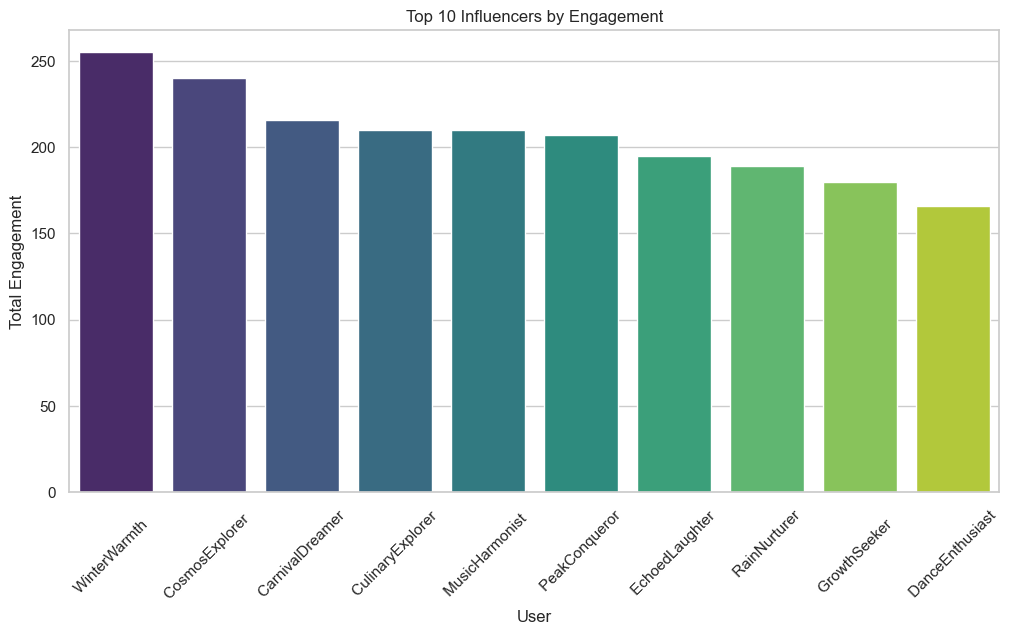

In [90]:
# Identify Top 10 Influencers (Users with Highest Engagement)
top_influencers = df.groupby('User')['Total_Engagement'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_influencers.index, y=top_influencers.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Influencers by Engagement")
plt.ylabel("Total Engagement")
plt.show()

In [96]:
# Identify Most Popular Posts
top_posts = df.sort_values(by='Total_Engagement', ascending=False).head(10)

print("\nTop 10 Popular Posts:")
print(top_posts[['Text', 'Total_Engagement']])


Top 10 Popular Posts:
                                                  Text  Total_Engagement
481  Surrounded by the colors of joy, a canvas pain...             120.0
530  Captivated by the spellbinding plot twists, th...             120.0
382  A sense of wonder at the vastness of the cosmo...             120.0
560  In the serene beauty of a sunset, nature unfol...             120.0
470  Dancing on sunshine, each step a celebration o...             120.0
550  After a series of defeats, the soccer team fac...             120.0
368  Elation over discovering a rare book in a quai...             120.0
540  Celebrating a historic victory in the World Cu...             120.0
355  Anticipation for an upcoming adventure in an e...             120.0
570  Underneath the city lights, the dancer express...             120.0


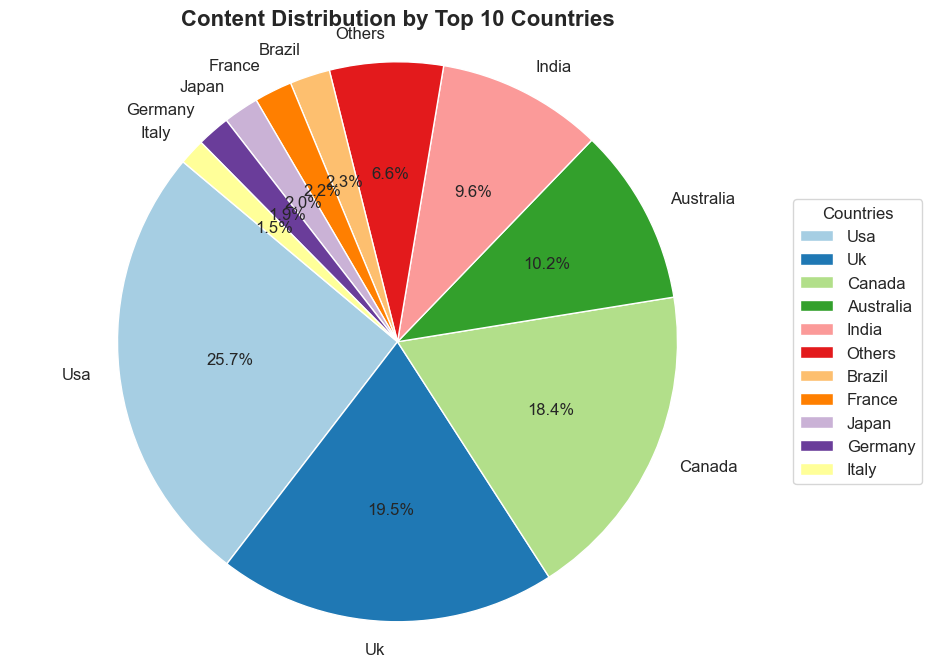

In [105]:
#showing the coutry with heiger content

# Set a clean and modern theme
sns.set_theme(style="whitegrid")

# Standardize the Country names by removing extra spaces and converting to title case
df['Country'] = df['Country'].str.strip().str.title()

# Count posts per country after standardization
country_counts = df['Country'].value_counts()

# Get the top 10 countries by post count; if more than 10 exist, aggregate the remaining into an "Others" category
if len(country_counts) > 10:
    top10 = country_counts.nlargest(10)
    others = country_counts.sum() - top10.sum()
    top10['Others'] = others
else:
    top10 = country_counts

# Sort the top10 series for a better visual order
top10 = top10.sort_values(ascending=False)

# Create a pie chart with enhanced styling
plt.figure(figsize=(10, 8))
# Use a colormap for distinct colors
colors = plt.cm.Paired(range(len(top10)))
patches, texts, autotexts = plt.pie(
    top10, 
    labels=top10.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    textprops={'fontsize': 12}
)

plt.title("Content Distribution by Top 10 Countries", fontsize=16, weight='bold')
plt.axis('equal')  # Ensures the pie is drawn as a circle

# Add a legend for clarity (positioned outside the pie chart)
plt.legend(patches, top10.index, title="Countries", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

plt.show()